# **AutoML with PyCaret-Regression**

[PyCaret](https://pycaret.org/): opern-source low-code machine learning library in Python that automates machine learning workflows.
Extra reading: [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

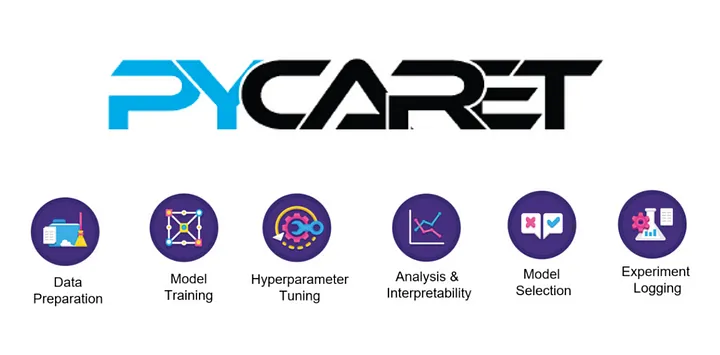

**Image source:** [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

[Dataset](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/14-Chapter-14/data/housing_data_sample.csv): The housing dataset has been made free on github by [NateGeorge](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/tree/main/14-Chapter-14/data) but for in-depth knowledge about the theory readers are strongly advised to read the book chapter 14.

Task: [Regression](https://en.wikipedia.org/wiki/Regression_analysis), predicting the SalePrice of a house using other features.

**Import libraries:**

In [36]:
#!pip install pycaret
#!pip install -r requirements.txt
#!pip install -r requirements-optional.txt

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [21]:
# read the csv file using pandas
df = pd.read_csv("/content/housing_data_sample.csv")

**Basic EDA and sanity check:**

In [22]:
# head (first 5 rows of the dataset)
df.head()

,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
0,1,8450,2003,2,8,548,856,854,208500
1,2,9600,1976,2,6,460,1262,0,181500
2,3,11250,2001,2,6,608,920,866,223500
3,4,9550,1915,1,7,642,961,756,140000
4,5,14260,2000,2,9,836,1145,1053,250000


In [23]:
# columns as list
df.columns.tolist()

['Id',
 'LotArea',
 'YearBuilt',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageArea',
 '1stFlrSF',
 '2ndFlrSF',
 'SalePrice']

In [24]:
# shape of the dataset
df.shape

(1460, 9)

In [25]:
# check datatypes
df.dtypes

Id              int64
LotArea         int64
YearBuilt       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageArea      int64
1stFlrSF        int64
2ndFlrSF        int64
SalePrice       int64
dtype: object

In [26]:
# check for missing values
df.isnull().sum()

Id              0
LotArea         0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
GarageArea      0
1stFlrSF        0
2ndFlrSF        0
SalePrice       0
dtype: int64

**Seaborn correlation:**

Check for highly correlated values for multi-collinearity

<AxesSubplot: >

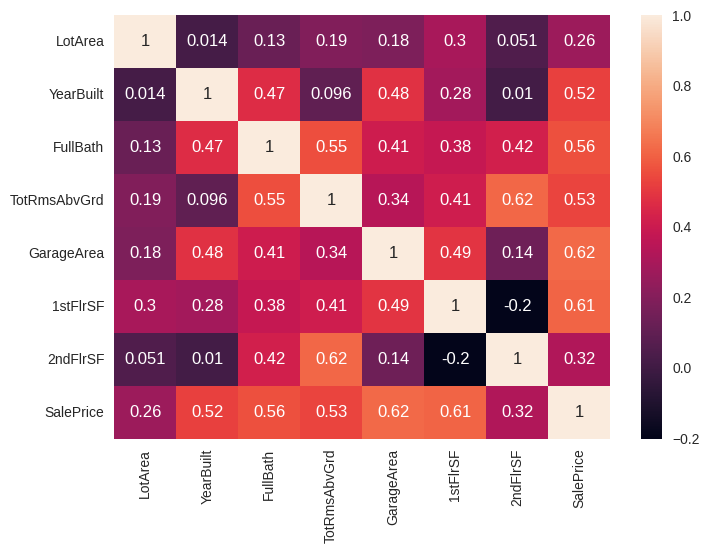

In [27]:
#sns.pairplot(df[df.columns.tolist()[1:]],  kind='scatter')
sns.heatmap(df[df.columns.tolist()[1:]].corr(), annot =True )

**After some sanity check and basic EDA we have get a sense of our dataset, now let's jump into the the nitty-gritty of [PyCaret](pycaret.org) for performing regression tasks**

In [30]:
# set features
features = df.drop('SalePrice', axis=1)

# target variable
targets = df['SalePrice']

In [28]:
# import
from pycaret.regression import setup, compare_models

# set our target
exp_clf = setup(df, target='SalePrice')
# evaluate criter/metrics (Mean Absolute Error[MAE])
best = compare_models(sort='MAE')

,Description,Value
0,Session id,6974
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 9)"
4,Transformed data shape,"(1460, 9)"
5,Transformed train set shape,"(1021, 9)"
6,Transformed test set shape,"(439, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,23377.3082,1359482877.7640,36440.5576,0.7746,0.1837,0.1378,0.3340
gbr,Gradient Boosting Regressor,23536.8509,1394145047.1228,36756.8425,0.7707,0.1831,0.1396,0.1730
rf,Random Forest Regressor,23882.4092,1456034093.3842,37592.3284,0.7591,0.1865,0.1398,0.7520
lightgbm,Light Gradient Boosting Machine,24424.7159,1492220594.9522,37991.6480,0.7589,0.1887,0.1424,0.2600
xgboost,Extreme Gradient Boosting,25310.0178,1530150757.9203,38889.5334,0.7473,0.1947,0.1468,0.1490
en,Elastic Net,27540.3998,2092357431.4299,44502.2349,0.6649,0.2193,0.1604,0.0200
ridge,Ridge Regression,27564.3195,2125678883.8772,44721.3335,0.6592,0.2192,0.1606,0.0200
lr,Linear Regression,27564.8226,2125941468.1488,44723.1076,0.6592,0.2193,0.1606,0.6720
lar,Least Angle Regression,27564.8226,2125941468.1488,44723.1076,0.6592,0.2193,0.1606,0.0220
lasso,Lasso Regression,27564.8804,2125935430.6426,44723.1709,0.6592,0.2193,0.1606,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

###**Result:**
as you can see the best estimator is [Extra Trees Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)



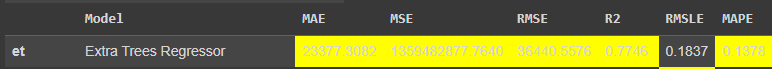

###**Use the model to make predictions:**
<code>predict_model function from PyCaret:</code>

In [31]:
# import predict_model, save_model and load_model
from pycaret.regression import predict_model, save_model, load_model

**Use the predict_model function to return a dataFrame with all the values and the predicted values:**

Note: This will automatically apply any feature transformations that had been done during model selection, such as categorical to numeric conversions. This returns a DataFrame with the same features as the input features DataFrame, but now with a new Label column, which has the predictions. For regression, this simply provides the numeric prediction [from the book]().

In [46]:
prediction_df = predict_model(best, features)

In [47]:
# rename "prediction_label" to "prediction_SalePrice"
prediction_df.rename(columns={"prediction_label":"prediction_SalePrice"},
                  inplace=True,
                  errors='raise')

In [48]:
# overview of the newDataFrame
prediction_df.head()

,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,prediction_SalePrice
0,1,8450,2003,2,8,548,856,854,210434.46
1,2,9600,1976,2,6,460,1262,0,169032.01
2,3,11250,2001,2,6,608,920,866,214102.50
3,4,9550,1915,1,7,642,961,756,157764.93
4,5,14260,2000,2,9,836,1145,1053,250000.00


### **Using learning curves**

Display the learning curve to see how your training and validation score is performing to know if you need to collect more data or not.
In this example you'll find out that the CV score is is still increasing. you can explore with the whole dataset made available by [NateGeorge packt](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/14-Chapter-14/data/housing_data_full.csv).

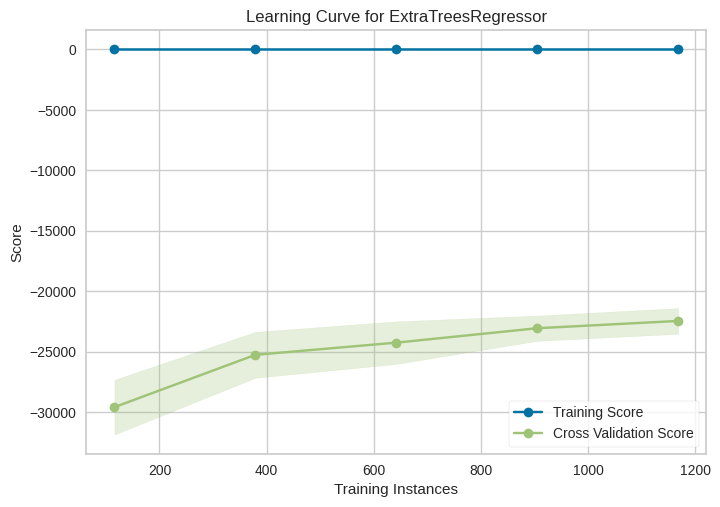

In [56]:
from yellowbrick.model_selection import LearningCurve
lc = LearningCurve(best, scoring='neg_mean_absolute_error')
lc.fit(features, targets)
lc.show();

**Once we have our optimized model, we can save it to a pickle file like so:**

In [51]:
save_model(best, 'Extra_Trees_Regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'LotArea', 'YearBuilt',
                                              'FullBath', 'TotRmsAbvGrd',
                                              'GarageArea', '1stFlrSF',
                                              '2ndFlrSF'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=6974))]),
 'Extra_Trees_Regressor.pkl')

**To load the model:**

In [52]:
etr_model = load_model('Extra_Trees_Regressor')

Transformation Pipeline and Model Successfully Loaded


##**You can also tune hyperparameters using PyCaret's**
<code>from pycaret.regression import tune_model</code> <br>
<code>tuned_model = tune_model(model)</code>

For performing classification tasks using PyCaret please check the notebook [PyCaret-classification]().